In [55]:
import numpy as np
import matplotlib.pyplot as plt


In [56]:
# define prior probabilities
p0 = 0.5  # fair coin
p1 = 0.5  # biased coin
x = 7  # number of heads

In [57]:
# define likelihood function
def likelihood(x, theta):
    return theta**x * (1-theta)**(10-x)         # binomial distribution with n=10

In [72]:
def posterior(x, p0, p1):
    likelihood_0 = likelihood(x, 0.5)        # fair coin has theta=0.5 
    likelihood_1 = likelihood(x, 0.8)        # biased coin has theta=0.8 - 80% chance of heads
    numerator_0 = likelihood_0 * p0           # numerator of Bayes' rule 
    numerator_1 = likelihood_1 * p1              # numerator of Bayes' rule
    denominator = numerator_0 + numerator_1
    posterior_0 = numerator_0 / denominator
    posterior_1 = numerator_1 / denominator
    return posterior_0, posterior_1

posterior_0, posterior_1 = posterior(x, p0, p1)
print(f"Posterior probability of fair coin: {posterior_0:.3f}")
print(f"Posterior probability of biased coin: {posterior_1:.3f}")


Posterior probability of fair coin: 0.368
Posterior probability of biased coin: 0.632


In [61]:
# calculate expected loss
def loss(state, decision):
    if state == 0 and decision == 1:
        return 1
    elif state == 1 and decision == 0:
        return 5
    else:
        return 0

def expected_loss(decision):
    return p0*loss(0, decision) + p1*loss(1, decision)

In [62]:
# calculate risks
risk_0 = expected_loss(0)
risk_1 = expected_loss(1)
print(f"Risk of choosing fair coin: {risk_0:.3f}")
print(f"Risk of choosing biased coin: {risk_1:.3f}")

Risk of choosing fair coin: 2.500
Risk of choosing biased coin: 0.500


In [63]:
def bayesian_classifier(x, p0, p1, theta_0, theta_1):
    posterior_0 = likelihood(x, theta_0) * p0
    posterior_1 = likelihood(x, theta_1) * p1
    return 0 if posterior_0 > posterior_1 else 1

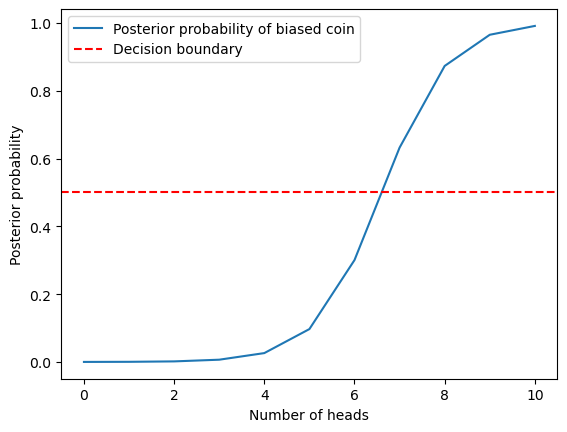

In [64]:
# plot classifier
x_values = np.arange(11)
posterior_1_values = [posterior(x, p0, p1)[1] for x in x_values]
plt.plot(x_values, posterior_1_values, label="Posterior probability of biased coin")
plt.axhline(y=0.5, color="r", linestyle="--", label="Decision boundary")
plt.xlabel("Number of heads")
plt.ylabel("Posterior probability")
plt.legend()
plt.show()